#  ***E***xploratory ***D***ata ***A***nalysis

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

In [8]:
raw_df = pd.read_csv("./phdata-ds-project-challenge/project_data.csv")

In [10]:
raw_df.columns

Index(['age', 'b1', 'b2', 'c10', 'c3', 'c4', 'c8', 'dow', 'employment', 'i1',
       'i2', 'i3', 'i4', 'i5', 'marriage-status', 'month', 'n2', 'n3', 'n4',
       'n5', 'n6', 'school', 'successful_sell'],
      dtype='object')

In [22]:
raw_df.head()

,age,b1,b2,c10,c3,c4,c8,dow,employment,i1,...,i5,marriage-status,month,n2,n3,n4,n5,n6,school,successful_sell
0,34,yes,no,no,False,new,NaN,fri,management,-1.8,...,5099.1,divorced,apr,2,530,999,0.001771,0,5 - a decent amount,no
1,28,yes,no,yes,False,new,NaN,thu,assistant,-1.8,...,5099.1,divorced,may,1,750,999,-1.673152,0,5 - a lot,yes
2,55,no,no,no,unknown,new,NaN,tue,leisure,1.4,...,5228.1,married,jul,3,600,999,0.927946,0,2 - a little bit,no
3,47,yes,no,no,False,new,NaN,mon,assistant,-0.1,...,5195.8,married,nov,1,860,999,0.203013,0,5 - a lot,no
4,49,no,no,no,unknown,new,NaN,tue,assistant,1.4,...,5228.1,married,jul,6,620,999,0.990804,0,5 - a lot,no


In [211]:
raw_df.b2.unique()

array(['no', 'yes', nan], dtype=object)

Let's assume that yes/no/-1/nan etc are all useful classes for a model. Without knowing a priori, Having a NaN c8 could be very meaningful.

First we can grab all of the columns by data type and then get the encoded versions (we'll also get rid of the successfull_sell column, which is are target)

In [220]:
categorical_df = raw_df.drop(columns=['successful_sell']).select_dtypes(include=['object'])

In [221]:
categorical_nan_filled_df = categorical_df.fillna('nan_filled')

In [222]:
categorical_nan_filled_df.b2.unique()

array(['no', 'yes', 'nan_filled'], dtype=object)

In [223]:
encoded_categories_df = pd.get_dummies(categorical_nan_filled_df)

In [225]:
encoded_categories_df

,b1_-1,b1_no,b1_yes,b2_nan_filled,b2_no,b2_yes,c10_no,c10_yes,c3_False,c3_True,...,month_oct,month_sep,school_0 - none,school_1 - almost none,school_2 - a little bit,school_3 - a bit more,school_4 - average amount,school_5 - a decent amount,school_5 - a lot,school_nan_filled
0,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
41184,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
41185,0,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
41186,0,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


# Now we should probably grab all of of the numerical columns and scale them. 
Without knowing much about the values, we should try to normalize them. Ideally, we can check through all of these values and perhaps gain insights from the client about what they are and we can look at how they're distributed etc... they could be numerical but still categorical fields as well, in which case we may want to do more one hot encoding. For simplicity, we'll assume they are all columns appropriate for standard scaling.

In [80]:
numerical_df = raw_df.select_dtypes(include=['int','float']) 

In [81]:
numerical_df

,age,i1,i2,i3,i4,i5,n2,n3,n4,n5,n6
0,34,-1.8,93.075,-47.1,1.405,5099.1,2,530,999,0.001771,0
1,28,-1.8,92.893,-46.2,1.327,5099.1,1,750,999,-1.673152,0
2,55,1.4,93.918,-42.7,4.962,5228.1,3,600,999,0.927946,0
3,47,-0.1,93.200,-42.0,4.191,5195.8,1,860,999,0.203013,0
4,49,1.4,93.918,-42.7,4.961,5228.1,6,620,999,0.990804,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,33,1.4,94.465,-41.8,4.865,5228.1,3,620,999,-0.050022,0
41184,36,1.4,94.465,-41.8,4.961,5228.1,1,650,999,-2.310504,0
41185,36,1.4,93.918,-42.7,4.962,5228.1,3,620,999,2.144238,0
41186,50,1.4,94.465,-41.8,4.959,5228.1,2,880,999,0.359144,0


In [82]:
#Quick check for nan values
numerical_df.isna().sum()

age    0
i1     0
i2     0
i3     0
i4     0
i5     0
n2     0
n3     0
n4     0
n5     0
n6     0
dtype: int64

In [83]:
numerical_df.describe()

,age,i1,i2,i3,i4,i5,n2,n3,n4,n5,n6
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.081886,93.575664,-40.502600,3.621291,5167.035911,2.567593,745.142032,962.475454,-0.000074,0.172963
std,10.42125,1.570960,0.578840,4.628198,1.734447,72.251528,2.770014,144.246196,186.910907,0.997024,0.494901
min,17.00000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.000000,500.000000,0.000000,-4.354231,0.000000
25%,32.00000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,1.000000,620.000000,999.000000,-0.679725,0.000000
50%,38.00000,1.100000,93.749000,-41.800000,4.857000,5191.000000,2.000000,750.000000,999.000000,0.001357,0.000000
75%,47.00000,1.400000,93.994000,-36.400000,4.961000,5228.100000,3.000000,870.000000,999.000000,0.673380,0.000000
max,98.00000,1.400000,94.767000,-26.900000,5.045000,5228.100000,56.000000,990.000000,999.000000,4.547729,7.000000


In [84]:
#Quick check that we have all 23 columns
raw_df.select_dtypes(include=['object']).shape

(41188, 12)

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
from math import sqrt

In [87]:
sc = StandardScaler()
sc.fit(numerical_df)
for column, mean, var in zip(numerical_df.columns, sc.mean_, sc.var_):
    print(column, mean,sqrt(var))

age 40.02406040594348 10.42112347183873
i1 0.08188550063125181 1.5709406698013324
i2 93.5756643682626 0.5788330221069571
i3 -40.50260027192386 4.6281416720195905
i4 3.621290812858114 1.7344263494718772
i5 5167.035910944936 72.25065056854487
n2 2.567592502670681 2.769979916234896
n3 745.1420316597067 144.2444448488001
n4 962.4754540157328 186.90863833384228
n5 -7.401282413516736e-05 0.9970115921981454
n6 0.17296299893172767 0.4948950719719037


In [88]:
scaled_values = sc.transform(numerical_df)

In [89]:
scaled_numerical_df = pd.DataFrame(scaled_values, columns=numerical_df.columns)

In [90]:
scaled_numerical_df

,age,i1,i2,i3,i4,i5,n2,n3,n4,n5,n6
0,-0.578062,-1.197935,-0.864955,-1.425496,-1.277824,-0.940281,-0.204909,-1.491510,0.195414,0.001851,-0.349494
1,-1.153816,-1.197935,-1.179380,-1.231034,-1.322795,-0.940281,-0.565922,0.033679,0.195414,-1.678093,-0.349494
2,1.437075,0.839061,0.591424,-0.474791,0.772999,0.845170,0.156105,-1.006223,0.195414,0.930801,-0.349494
3,0.669404,-0.115781,-0.649003,-0.323542,0.328471,0.398115,-0.565922,0.796273,0.195414,0.203695,-0.349494
4,0.861322,0.839061,0.591424,-0.474791,0.772422,0.845170,1.239145,-0.867569,0.195414,0.993848,-0.349494
...,...,...,...,...,...,...,...,...,...,...,...
41183,-0.674021,0.839061,1.536429,-0.280328,0.717072,0.845170,0.156105,-0.867569,0.195414,-0.050098,-0.349494
41184,-0.386145,0.839061,1.536429,-0.280328,0.772422,0.845170,-0.565922,-0.659589,0.195414,-2.317355,-0.349494
41185,-0.386145,0.839061,0.591424,-0.474791,0.772999,0.845170,0.156105,-0.867569,0.195414,2.150740,-0.349494
41186,0.957281,0.839061,1.536429,-0.280328,0.771269,0.845170,-0.204909,0.934927,0.195414,0.360294,-0.349494


# Now we should stitch together both dataframes. 
The indices haven't changed, so this will be simple

In [226]:
transformed_df = scaled_numerical_df.merge(encoded_categories_df, how='inner', left_index=True, right_index=True)

In [227]:
transformed_df.describe()

,age,i1,i2,i3,i4,i5,n2,n3,n4,n5,...,month_oct,month_sep,school_0 - none,school_1 - almost none,school_2 - a little bit,school_3 - a bit more,school_4 - average amount,school_5 - a decent amount,school_5 - a lot,school_nan_filled
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,-1.499561e-16,2.415169e-18,1.603519e-14,-2.319425e-16,1.392172e-16,-1.034003e-14,-7.763043e-17,-1.400475e-16,-2.626928e-16,2.880952e-17,...,0.017432,0.013839,0.000437,0.101389,0.055647,0.146766,0.231014,0.127294,0.295426,0.042027
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,0.130877,0.116824,0.020901,0.301846,0.229242,0.353877,0.421486,0.333306,0.456239,0.200653
min,-2.209365e+00,-2.216433e+00,-2.374889e+00,-2.224953e+00,-1.722351e+00,-2.815697e+00,-5.659220e-01,-1.699490e+00,-5.149443e+00,-4.367208e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.699804e-01,-1.197935e+00,-8.649547e-01,-4.747909e-01,-1.312994e+00,-9.402810e-01,-5.659220e-01,-8.675692e-01,1.954139e-01,-6.816880e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.942267e-01,6.480923e-01,2.994571e-01,-2.803284e-01,7.124599e-01,3.316799e-01,-2.049085e-01,3.367872e-02,1.954139e-01,1.435191e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.694038e-01,8.390606e-01,7.227225e-01,8.864466e-01,7.724221e-01,8.451701e-01,1.561049e-01,8.655998e-01,1.954139e-01,6.754722e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.563310e+00,8.390606e-01,2.058168e+00,2.939106e+00,8.208531e-01,8.451701e-01,1.928982e+01,1.697521e+00,1.954139e-01,4.561434e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Now we can prep the labels

In [95]:
raw_df.successful_sell.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
#looks like there are no gaps. we can make yes=1 and no=0

In [101]:
encoded_labels = (raw_df.successful_sell == 'yes') * 1.0

In [102]:
encoded_labels

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
41183    0.0
41184    0.0
41185    0.0
41186    0.0
41187    0.0
Name: successful_sell, Length: 41188, dtype: float64

In [103]:
encoded_labels.describe()

count    41188.000000
mean         0.112654
std          0.316173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: successful_sell, dtype: float64

One challenge we can see right away is the class imbalance between successful and unsuccessful sells. Only 11% of the labels in this dataset are successful sells. This can make learning a challenge. In addition, we should establish with the client the their goals for the model. How often would they like to to pursue a sale that is unsuccesful? (probably never, but) How often would they like not a pursue a sale that would've been succesful? Both false positives and false negatives have costs to the business, and their sensitivity to each depends a lot on a client's specific needs. These are always tough conversations, as a client doesn't want _either_ but all models will trade off between them.

# Lets look at the correlations of each feature and the true values

<AxesSubplot:>

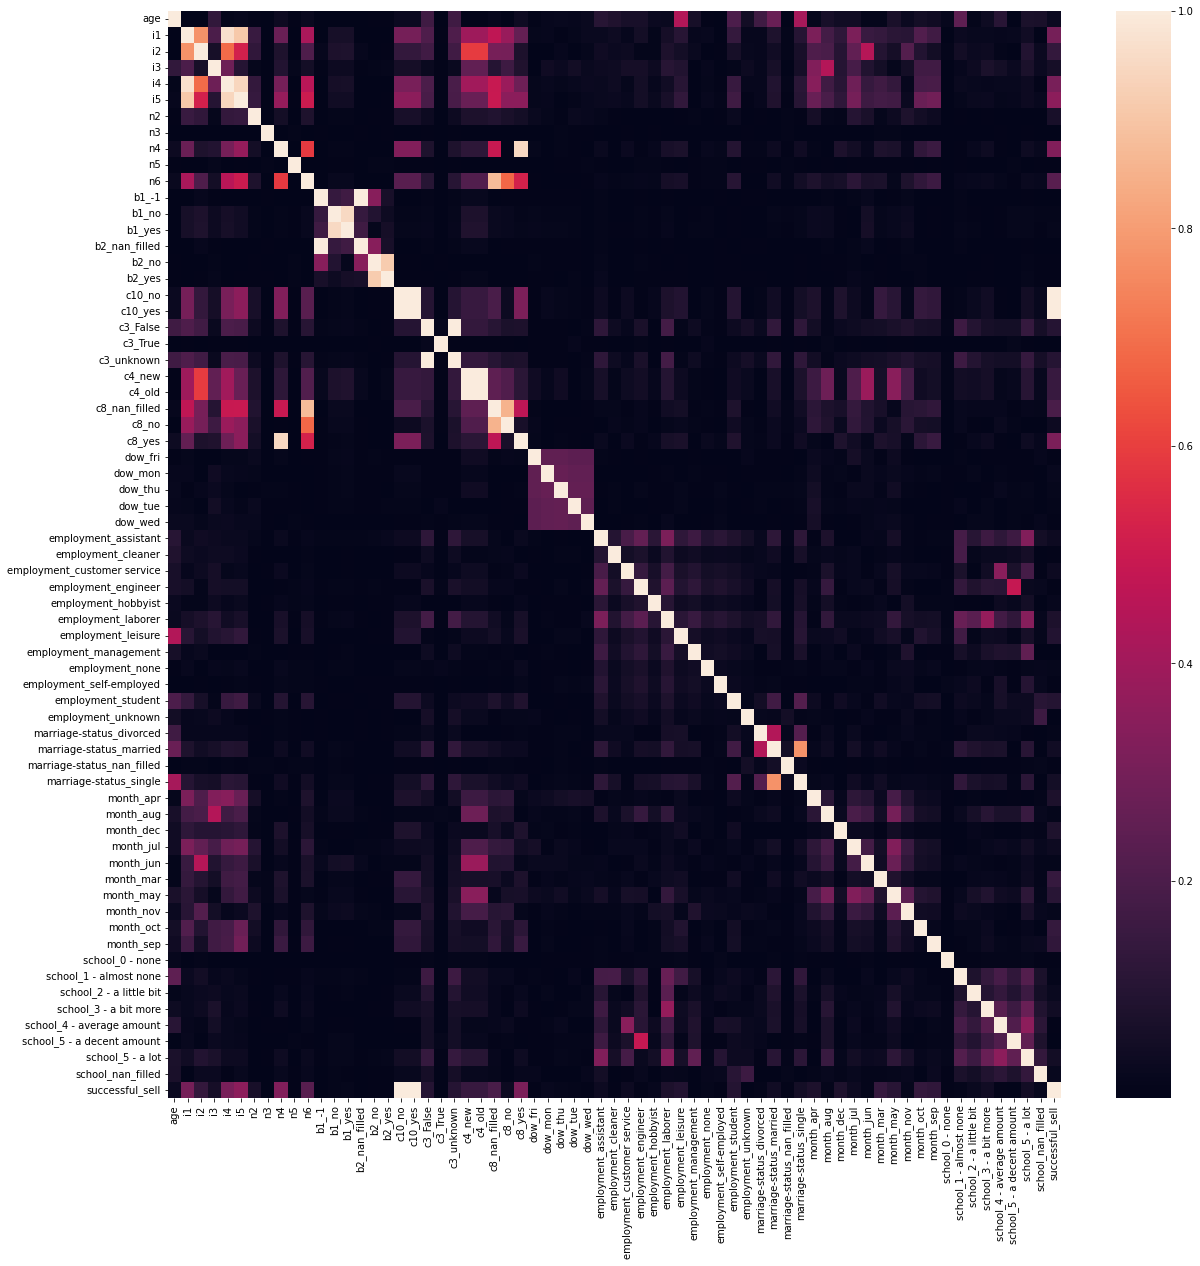

In [364]:
corrs = transformed_df.merge(encoded_labels, how='inner', left_index=True, right_index=True).corr().abs()

fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrs, ax=ax)

Reading across the bottom, I can see that c10_no and c10_yes anti-correlate, and correlate _perfectly_. Let's assume that those are repetitions of the target value. In addition, ther eare correlations. c8 yes anticorrelates with n4. There are some correlations between some of the yes/no/unknown style classes where (like c3 where unknown and False anticorrelate) Having perfectly correlated variables can be harmful to models, so we'll drop one of each of the correlated pairs where the correlation is higher than 0.95.

In [235]:
correlation_cut = 0.95
def value_is_1(cell_value):

    highlight = 'background-color: darkorange;'
    default = ''

    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return highlight
    return default

In [230]:
counts = corrs[corrs.abs() > correlation_cut].count()

list_of_high_corrs = counts[counts > 1].index.to_list()

In [233]:
high_corrs = (corrs.loc[list_of_high_corrs,list_of_high_corrs].abs() > correlation_cut) * 1.0

In [237]:
high_corrs.style.applymap(value_is_1)

,i1,i4,n4,b1_-1,b1_no,b1_yes,b2_nan_filled,c10_no,c10_yes,c3_False,c3_unknown,c4_new,c4_old,c8_yes,successful_sell
i1,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
i4,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n4,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
b1_-1,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
b1_no,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
b1_yes,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
b2_nan_filled,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c10_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
c10_yes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
c3_False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
So, we can remove i4, c10_no, c10_yes, c3_unknown, c4_new, b1_no, n4, b1_-1

In [238]:
transformed_cleaned_df = transformed_df.drop(columns = ['i4', 'c10_no', 'c10_yes', 'c3_unknown', 'c4_new', 'b1_no', 'n4', 'b1_-1'])

<AxesSubplot:>

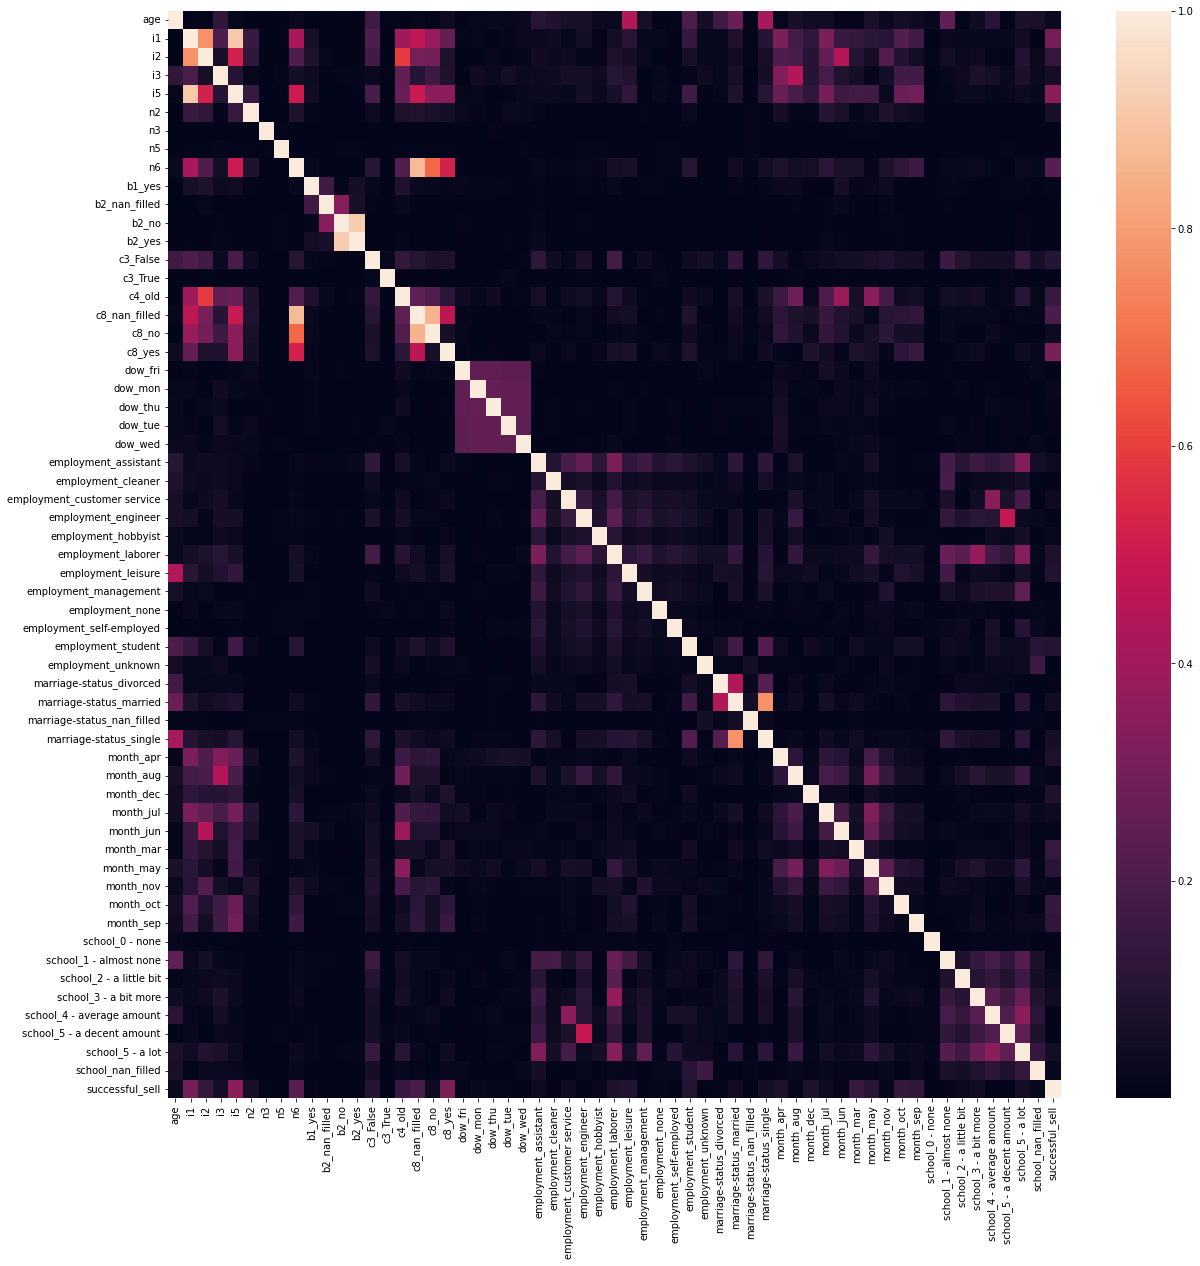

In [365]:
corrs = transformed_cleaned_df.merge(encoded_labels, how='inner', left_index=True, right_index=True).corr().abs()

fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrs, ax=ax)

There are definitely still some variables that are fairly highly correlated, but nothing crazy high now. We'll proceed and if there are issues, we can adjust this factor

In [361]:
corrs[['successful_sell']].abs().sort_values(by='successful_sell', ascending=False).iloc[1:,:]

,successful_sell
i5,0.354678
c8_yes,0.316269
i1,0.298334
n6,0.230181
c8_nan_filled,0.193507
c4_old,0.144773
month_mar,0.144014
month_oct,0.137366
i2,0.136211
month_sep,0.126067


# Train + Testing split

In [242]:
X = transformed_cleaned_df.to_numpy()
y = encoded_labels.to_numpy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
Simple to understand and build. This is a straightforward and low-cost approach which often yields good results in straightforward cases and provides a great benchmark

In [325]:
from sklearn.linear_model import LogisticRegression

In [326]:
clf = LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced').fit(X_train, y_train)

In [327]:
y_train_preds = clf.predict(X_train)

In [328]:
#Confusion matrix

In [329]:
from sklearn.metrics import confusion_matrix

In [330]:
cf_matrix = confusion_matrix(y_train, y_train_preds)
print(cf_matrix)

[[23154  4257]
 [ 1263  2217]]


<AxesSubplot:>

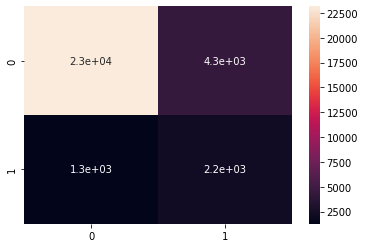

In [331]:
sns.heatmap(cf_matrix, annot=True)

# Check the test set

In [332]:
y_test_preds = clf.predict(X_test)

[[7717 1420]
 [ 413  747]]


<AxesSubplot:>

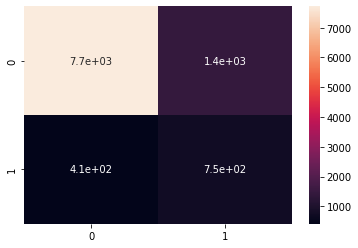

In [333]:
cf_matrix = confusion_matrix(y_test, y_test_preds)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

In [334]:
from sklearn.metrics import PrecisionRecallDisplay

In [335]:
y_test_scores = clf.predict_proba(X_test)

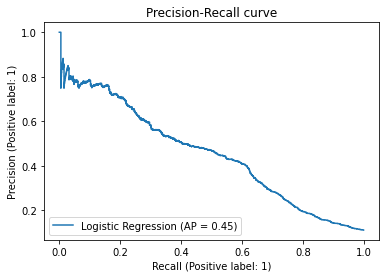

In [336]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_test_scores[:,1], name="Logistic Regression")
_ = display.ax_.set_title("Precision-Recall curve")

In [337]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_preds)

0.8219869865009226

Definitely not stellar performance, there's certainly more tuning and tweaking that can be done, but at least out of the box, the solution is not ultra-simple

# A More Complex Approach

A random forest approach using xgBoost. The first architecture is straightforward and easy to understand. xgBoost is a beast, the challenge may be trying to get it to not over fit.

In [366]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

In [367]:
#lets redraw our train/test set and we'll stratify to keep the amount of each class even

In [368]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=1121218
)

In [369]:
xgb_cl.fit(X_train, y_train)

/Users/Andrew_1/miniforge3/envs/datascience/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:22:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [370]:
y_test_preds = xgb_cl.predict(X_test)

In [371]:
accuracy_score(y_test, y_test_preds)

0.8942410410799262

[[8911  226]
 [ 863  297]]


<AxesSubplot:>

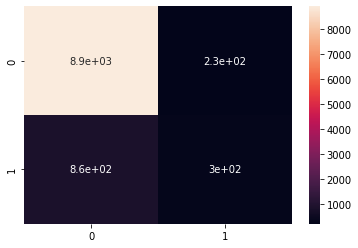

In [372]:
cf_matrix = confusion_matrix(y_test, y_test_preds)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

In [374]:
xgb_cl.save_model('xgb_model.json')

The accuracy is improved from 0.82 to 0.89, which is very significant improvement. There are about have as many FP+FN in the xgBoost model as the LogisticRegression. To improve performance from here we can perform a hyperparameter search to find the best setup for this dataset.

In [347]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [348]:
from sklearn.model_selection import GridSearchCV

We'll keep our HP tune simple and do a grid search with cross validation.

In [349]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X, y)

/Users/Andrew_1/miniforge3/envs/datascience/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/Andrew_1/miniforge3/envs/datascience/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/Andrew_1/miniforge3/envs/datascience/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[13:10:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:43] WARNING: /Users/runner/miniforge3/cond

/Users/Andrew_1/miniforge3/envs/datascience/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/Andrew_1/miniforge3/envs/datascience/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/Andrew_1/miniforge3/envs/da

[13:10:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:43] WARNING: /Users/runner/miniforge3/cond

/Users/Andrew_1/miniforge3/envs/datascience/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/Andrew_1/miniforge3/envs/datascience/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/Andrew_1/miniforge3/envs/da

KeyboardInterrupt: 

In [363]:
y_test_preds = xgb_cl.predict(X_test)
accuracy_score(y_test, y_test_preds)

NotFittedError: need to call fit or load_model beforehand

In [375]:
pd.read_csv('forecasts.csv')

,Unnamed: 0,ids,predictions
0,0,0,0.087923
1,1,1,0.138482
2,2,2,0.035347
3,3,3,0.024952
4,4,4,0.049617
...,...,...,...
41183,41183,41183,0.027516
41184,41184,41184,0.002488
41185,41185,41185,0.097133
41186,41186,41186,0.036451
